In [12]:
## Packages
library(dplyr)
library(stringr)
library(broom)
library(ggplot2)
library(tidyr)
library(gender)
library(stringr)



ERROR: Error in library(gender): there is no package called ‘gender’


In [13]:
## Data

CD_results_long <- read.csv("flipped_house_2018_long.csv")

CD_results_wide <- read.csv("flipped_house_2018_wide.csv")


# Add region
states_northeast <- c("CT", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT")
states_west <- c("AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY")
states_midwest <- c("IN", "IL", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI")
states_south <- c("AL", "AR", "DE", "DC", "FL", "GA", "KS", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV")

CD_results_long <- CD_results_long %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

# Replace "dataset" with name of your dataset
CD_results_wide <- CD_results_wide %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))


head(CD_results_long)

head(CD_results_wide)


,X,state,district,candidate,gender,total_votes,vote_share,winner_party,winner_gender,pres_winner,flip,year,party,region
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
1,1,AK,0,Alyse S. Galvin,female,131199,0.4649710,Republican,male,Trump,FALSE,2018,Democrat,West
2,2,AL,1,Robert Kennedy Jr.,male,89226,0.3677648,Republican,male,Trump,FALSE,2018,Democrat,South
3,3,AL,2,Tabitha Isner,female,86931,0.3842594,Republican,female,Trump,FALSE,2018,Democrat,South
4,4,AL,3,Mallory Hagan,female,83996,0.3621844,Republican,male,Trump,FALSE,2018,Democrat,South
5,5,AL,4,Lee Auman,male,46492,0.2012911,Republican,male,Trump,FALSE,2018,Democrat,South
6,6,AL,6,Danner Kline,male,85644,0.3077089,Republican,male,Trump,FALSE,2018,Democrat,South


,X,state,district,candidate_democrat,candidate_republican,total_votes_democrat,total_votes_republican,vote_share_dem,vote_share_rep,winner_party,year,gender_dem,gender_rep,winner_gender,pres_winner,flip,region
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1,1,AK,0,Alyse S. Galvin,Don Young,131199,149779,0.4649710,0.5308187,Republican,2018,female,male,male,Trump,FALSE,West
2,2,AL,1,Robert Kennedy Jr.,Bradley Byrne,89226,153228,0.3677648,0.6315633,Republican,2018,male,male,male,Trump,FALSE,South
3,3,AL,2,Tabitha Isner,Martha Roby,86931,138879,0.3842594,0.6138841,Republican,2018,female,female,female,Trump,FALSE,South
4,4,AL,3,Mallory Hagan,Mike Rogers,83996,147770,0.3621844,0.6371731,Republican,2018,female,male,male,Trump,FALSE,South
5,5,AL,4,Lee Auman,Robert Aderholt,46492,184255,0.2012911,0.7977477,Republican,2018,male,male,male,Trump,FALSE,South
6,6,AL,6,Danner Kline,Gary Palmer,85644,192542,0.3077089,0.6917809,Republican,2018,male,male,male,Trump,FALSE,South


In [14]:
## Flipped districts
# Fill gender for unknowns, only 5
CD_results_long %>%
    filter(flip == TRUE, gender == "Unknown")

CD_results_long[310,"gender"] <- "male"
CD_results_long[310,"winner_gender"] <- "male"
CD_results_long[311,"gender"] <- "female"
CD_results_long[311,"winner_gender"] <- "female"
CD_results_long[716,"gender"] <- "male"
CD_results_long[720,"gender"] <- "male"
CD_results_long[720,"winner_gender"] <- "female"
CD_results_long[721,"gender"] <- "female"



X,state,district,candidate,gender,total_votes,vote_share,winner_party,winner_gender,pres_winner,flip,year,party,region
<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
310,PA,3,Dwight Evans,Unknown,287610,0.9338078,Democrat,Unknown,Trump,TRUE,2018,Democrat,Northeast
311,PA,4,Madeleine Dean Cunnane,Unknown,211524,0.6352244,Democrat,Unknown,Trump,TRUE,2018,Democrat,Northeast
716,PA,17,Keith Rothfus,Unknown,142417,0.4374269,Democrat,male,Trump,TRUE,2018,Republican,Northeast
720,PA,4,Daniel David,Unknown,121467,0.3647756,Democrat,Unknown,Trump,TRUE,2018,Republican,Northeast
721,PA,5,Pearl Kim,Unknown,106075,0.3481133,Democrat,female,Trump,TRUE,2018,Republican,Northeast


## Tables

In [15]:
CD_results_long %>%
    filter(party == "Democrat", flip == TRUE) %>%
    group_by(gender) %>%
    summarize(count = n())

CD_results_long %>%
    filter(party == "Republican", flip == TRUE) %>%
    group_by(gender) %>%
    summarize(count = n())


CD_results_long %>%
    filter(party == "Democrat", flip == TRUE) %>%
    group_by(region, gender) %>%
    summarize(count = n()) %>%
    arrange(desc(count))

CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    group_by(flip, gender) %>%
    summarize(count = n())

CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    group_by(gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count / sum(count))


`summarise()` ungrouping output (override with `.groups` argument)



gender,count
<chr>,<int>
female,14
male,22


`summarise()` ungrouping output (override with `.groups` argument)



gender,count
<chr>,<int>
female,8
male,26
N/A,2


`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,gender,count
<chr>,<chr>,<int>
Northeast,male,17
Midwest,female,6
South,female,4
Midwest,male,2
Northeast,female,2
West,female,2
West,male,2
South,male,1


`summarise()` regrouping output by 'flip' (override with `.groups` argument)



flip,gender,count
<lgl>,<chr>,<int>
FALSE,female,148
FALSE,male,195
TRUE,female,14
TRUE,male,22


`summarise()` ungrouping output (override with `.groups` argument)



gender,count,prop
<chr>,<int>,<dbl>
female,162,0.4274406
male,217,0.5725594


## Graphs

`summarise()` regrouping output by 'region' (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)



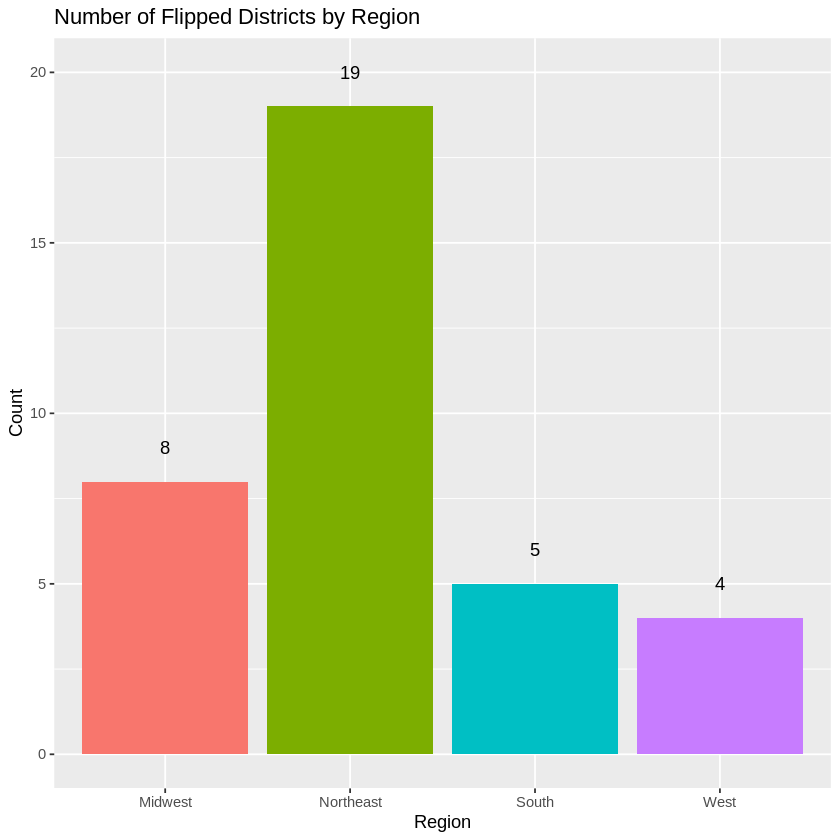

`summarise()` ungrouping output (override with `.groups` argument)



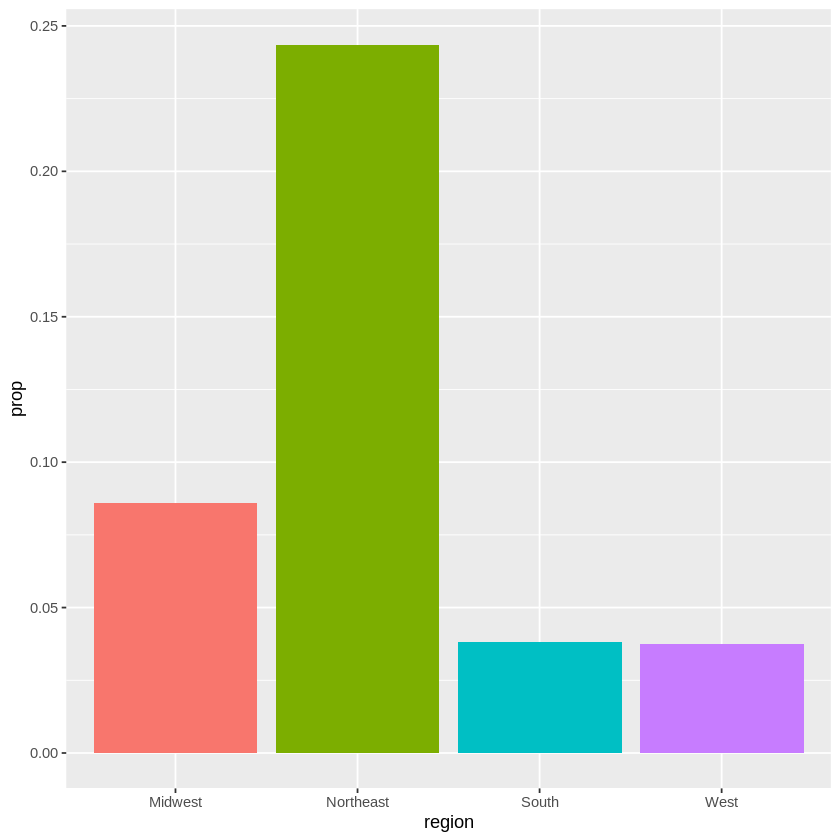

`summarise()` regrouping output by 'flip' (override with `.groups` argument)



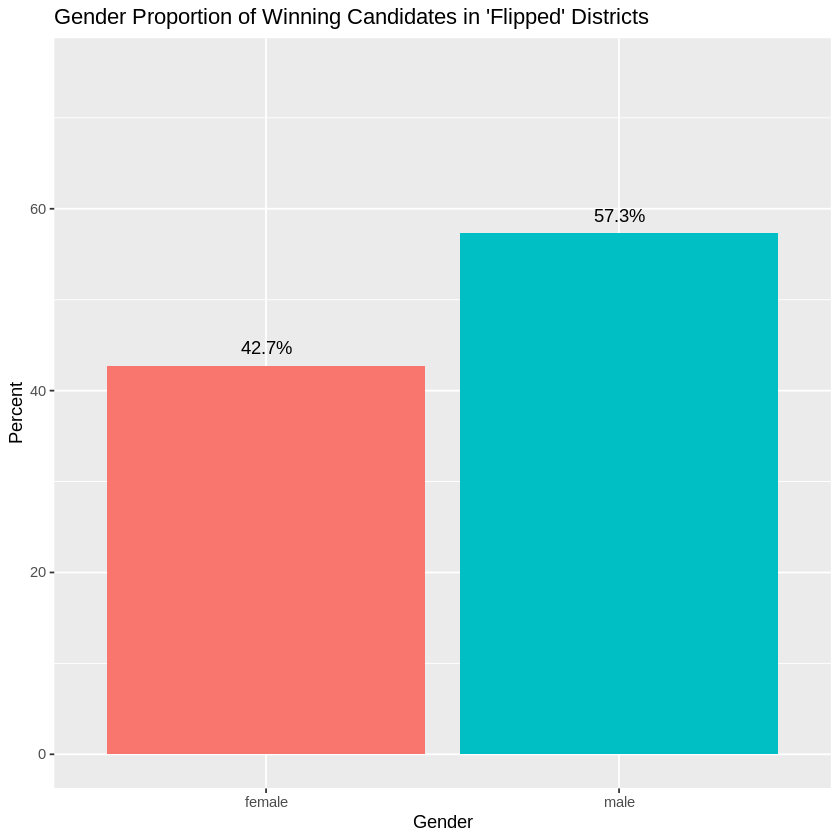

`summarise()` regrouping output by 'flip' (override with `.groups` argument)



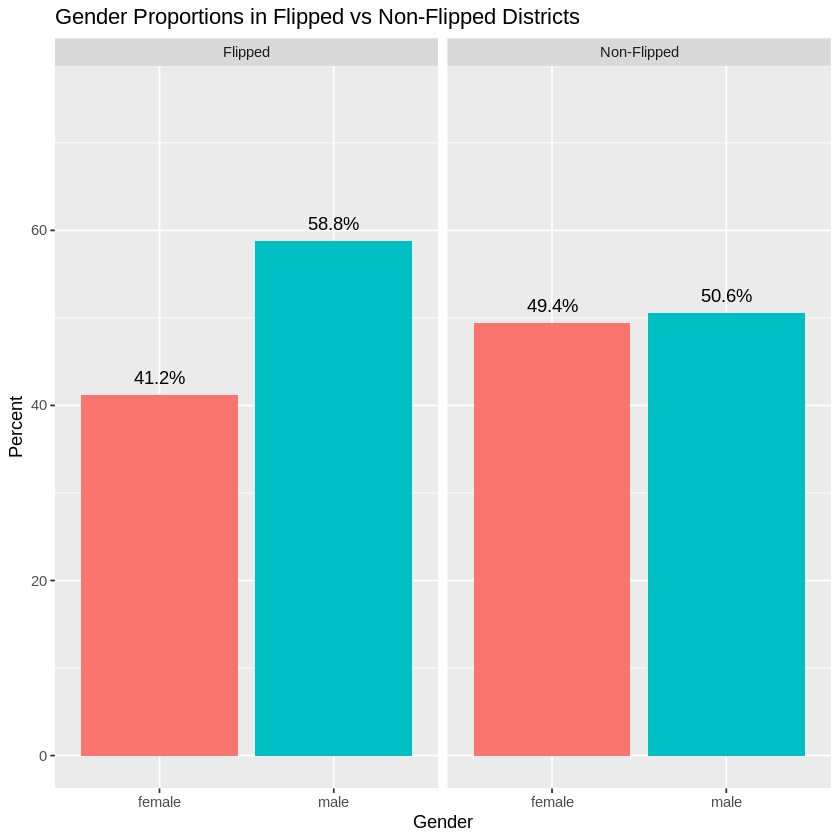

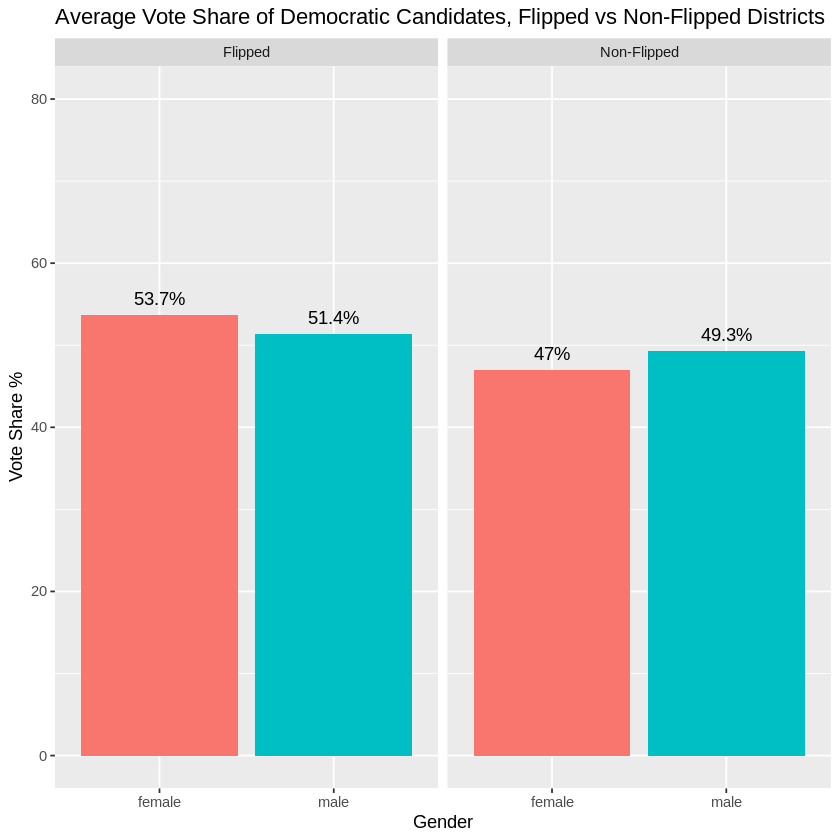

In [16]:
## Visuals

# Raw count of flips by region
CD_results_wide %>%
    group_by(region, flip) %>%
    summarize(count = n()) %>%
    filter(flip == TRUE) %>%
    arrange(desc(count)) %>%
    ggplot(aes(x = region, y = count, fill = region, label = count)) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,1)) + 
        theme(legend.position = "none") + 
        labs(title = "Number of Flipped Districts by Region",
            x = "Region",
            y = "Count") + 
        ylim(0,20)

# Flips as proportion of total seats by region
CD_results_wide %>%
    group_by(region, flip) %>%
    summarize(count = n()) %>%
    mutate(prop = count / sum(count)) %>%
    filter(flip == TRUE) %>%
    arrange(desc(count)) %>%
    ggplot(aes(x = region, y = prop, fill = region)) + 
        geom_bar(stat = "identity") + 
        theme(legend.position = "none")



CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    group_by(gender) %>%
    summarize(count = n()) %>%
    mutate(prop = round(100*count / sum(count),1)) %>%
    ggplot(aes(x = gender, y = prop, fill = gender, label = paste(prop, "%", sep =""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0, 2)) +
        theme(legend.position = "none") + 
        labs(title = "Gender Proportion of Winning Candidates in 'Flipped' Districts",
            x = "Gender",
            y = "Percent") + 
        ylim(0, 75)


CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), vote_share < 0.75, pres_winner == "Trump") %>%
    group_by(flip, gender) %>%
    summarize(count = n()) %>%
    mutate(prop = round(100*count / sum(count),1),
          flip = ifelse(flip == FALSE, "Non-Flipped", "Flipped")) %>%
    ggplot(aes(x = gender, y = prop, fill = gender, label = paste(prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ flip) + 
        theme(legend.position = "none") + 
        labs(title = "Gender Proportions in Flipped vs Non-Flipped Districts",
            x = "Gender",
            y = "Percent") + 
        ylim(0, 75)
        

CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), vote_share < 0.75, candidate != "No candidate") %>%
    group_by(flip, gender) %>%
    summarize(avg_vote_share = round(100*mean(vote_share),1)) %>%
    mutate(flip = ifelse(flip == FALSE, "Non-Flipped", "Flipped")) %>%
    ggplot(aes(x = gender, y = avg_vote_share, fill = gender, label = paste(avg_vote_share, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ flip) + 
        theme(legend.position = "none") + 
        labs(title = "Average Vote Share of Democratic Candidates, Flipped vs Non-Flipped Districts",
            x = "Gender",
            y = "Vote Share %") + 
        ylim(0, 80)
# Kind of interesting that there are more males than females in the flipped district winners but females had a higher vote share on average
# Many ways to split this last one, not exactly fair to compare winners to a group that includes losers, but comparing them to non-flipped winners only would include 'safe' seats with high Dem margins




## Models

In [17]:
## Regressions
# Logistic regression, binomial outcome
model1 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    glm(flip ~ gender, data = ., family = "binomial")
tidy(model1)

model2 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), pres_winner == "Trump", vote_share < 0.75) %>%
    glm(flip ~ gender + vote_share + region, data = ., family = "binomial")
tidy(model2)
# Basic takeaway is that gender has no effect on whether a district flipped or not, possible that lack of controls and small sample size makes it difficult to detect

model3 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), flip == TRUE, vote_share != 1) %>%
    lm(vote_share ~ gender, data = .)
tidy(model3)

model4 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), flip == TRUE, vote_share < 0.75) %>%
    lm(vote_share ~ gender + region, data = .)
tidy(model4)



model5 <- CD_results_wide %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_gender %in% c("male", "female"), pres_winner == "Trump", vote_share_dem < 0.75, vote_share_rep < 0.75) %>%
    glm(flip ~ gender_dem + gender_rep + region, data = ., family = "binomial")
tidy(model5)
# No effect still when adding in gender of opponent as control



    


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.3581549,0.2796164,-8.433537,3.353719e-17
gendermale,0.1761978,0.3588427,0.491017,6.234144e-01


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-52.03004355,12.589542,-4.13279866,3.583726e-05
gendermale,-0.47334504,1.081525,-0.43766456,6.616295e-01
vote_share,105.01308658,25.390111,4.13598381,3.534371e-05
regionNortheast,5.28806721,1.851189,2.85657868,4.282339e-03
regionSouth,-0.09334951,1.109586,-0.08413006,9.329530e-01
regionWest,0.37962860,1.403068,0.27057033,7.867215e-01


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.536749663,0.02298012,23.35712602,4.248035e-22
gendermale,-0.002860689,0.02966721,-0.09642593,9.237655e-01


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.548217238,0.01829729,29.9616663,2.278209e-23
gendermale,-0.034100088,0.02193869,-1.5543360,1.309511e-01
regionNortheast,0.003929517,0.02530932,0.1552597,8.776922e-01
regionSouth,-0.034993334,0.02816819,-1.2422996,2.240786e-01
regionWest,-0.014215876,0.03072798,-0.4626361,6.470779e-01


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.3452042,0.6696211,-0.5155217,6.061885e-01
gender_demmale,-0.1773439,0.5262832,-0.3369743,7.361363e-01
gender_repmale,-1.5237523,0.6136739,-2.4830000,1.302811e-02
regionNortheast,3.0918410,0.7560449,4.0894939,4.323155e-05
regionSouth,-0.8704396,0.6148848,-1.4156140,1.568885e-01
regionWest,-0.3907940,0.6929999,-0.5639165,5.728110e-01
